# Análise de Dados de Pessoas que Morreram de Infarto

Neste notebook, foi conduzida uma análise detalhada dos dados de pessoas que morreram de infarto no Brasil. O objetivo principal foi identificar possíveis padrões e correlações entre diferentes variáveis, como idade, sexo, estado civil, escolaridade, ocupação, entre outras, a fim de compreender melhor os fatores de risco associados a essa condição de saúde.

Inicialmente, uma análise completa da base de dados foi realizada, incluindo pessoas de todas as idades. Posteriormente, foi feito um recorte para incluir apenas pessoas com menos de 60 anos, uma vez que o infarto nessa faixa etária é menos comum e pode estar relacionado a diferentes causas em comparação com pessoas mais velhas. Em seguida, foram conduzidas análises específicas para identificar as principais causas do infarto e investigar possíveis correlações com variáveis socioeconômicas e demográficas.

Foram utilizadas técnicas de visualização de dados, como gráficos de barras e análises estatísticas descritivas, para apresentar os resultados de forma clara e informativa. Além disso, foram criados mapeamentos para categorias específicas, como escolaridade e estado civil, a fim de facilitar a interpretação dos dados.

Essa análise pode fornecer insights importantes para profissionais de saúde e pesquisadores interessados em compreender melhor os fatores de risco associados ao infarto em pessoas mais jovens e direcionar estratégias de prevenção e tratamento mais eficazes.


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df_infarto = pd.read_csv('../data/bq-results-infarto-2015-2022.csv')

/var/folders/ym/vtsfljl13gj6ms14j1387nhc0000gn/T/ipykernel_3428/4018039245.py:1: DtypeWarning: Columns (57,60,61,74,86) have mixed types. Specify dtype option on import or set low_memory=False.
  df_infarto = pd.read_csv('../data/bq-results-infarto-2015-2022.csv')


In [27]:
# Estatísticas descritivas das variáveis numéricas
desc_stats = df_infarto.describe()
print(desc_stats)


                 ano  sequencial_obito  tipo_obito   naturalidade  \
count  637551.000000      5.477280e+05    637551.0  597602.000000   
mean     2018.991878      5.335531e+05         2.0     823.861811   
std         2.001935      5.023161e+05         0.0      73.167157   
min      2016.000000      1.000000e+00         2.0       4.000000   
25%      2017.000000      6.339400e+04         2.0     826.000000   
50%      2019.000000      3.812375e+05         2.0     831.000000   
75%      2021.000000      9.371635e+05         2.0     835.000000   
max      2022.000000      1.832514e+06         2.0     999.000000   

               idade           sexo       raca_cor   estado_civil  \
count  636582.000000  637551.000000  623222.000000  621570.000000   
mean       69.592710       1.407872       2.242828       2.558838   
std        14.697956       0.491599       1.420660       1.612633   
min         0.000000       0.000000       1.000000       1.000000   
25%        60.000000       1.0000

## Descrição das Variáveis

### Escolaridade
- **1:** Nenhuma
- **2:** De 1 a 3 anos
- **3:** De 4 a 7 anos
- **4:** De 8 a 11 anos
- **5:** 12 anos e mais
- **9:** Ignorado

### Situação Conjugal
- **1:** Solteiro
- **2:** Casado
- **3:** Viúvo
- **4:** Separado judicialmente/divorciado
- **5:** União estável
- **9:** Ignorado


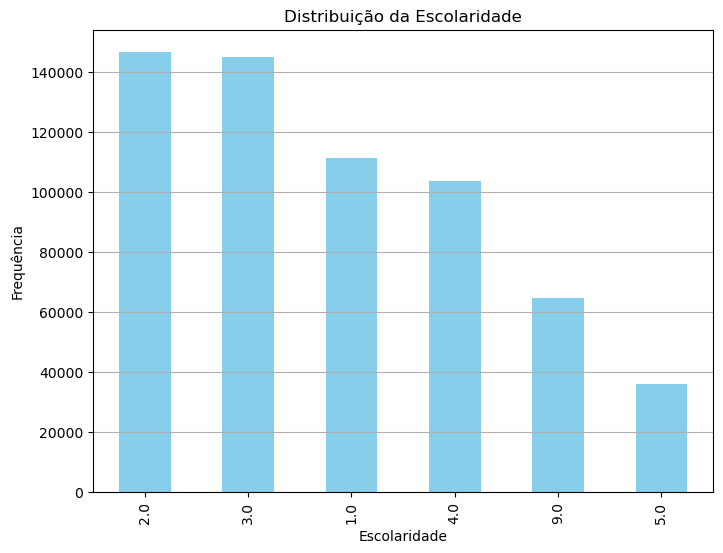

In [28]:
# Substituir os valores das variáveis categóricas pelos valores reais
escolaridade_counts = df_infarto['escolaridade'].value_counts()

# Gráfico de barras para a distribuição da escolaridade
plt.figure(figsize=(8, 6))
escolaridade_counts.plot(kind='bar', color='skyblue')
plt.title('Distribuição da Escolaridade')
plt.xlabel('Escolaridade')
plt.ylabel('Frequência')
plt.grid(axis='y')
plt.show()


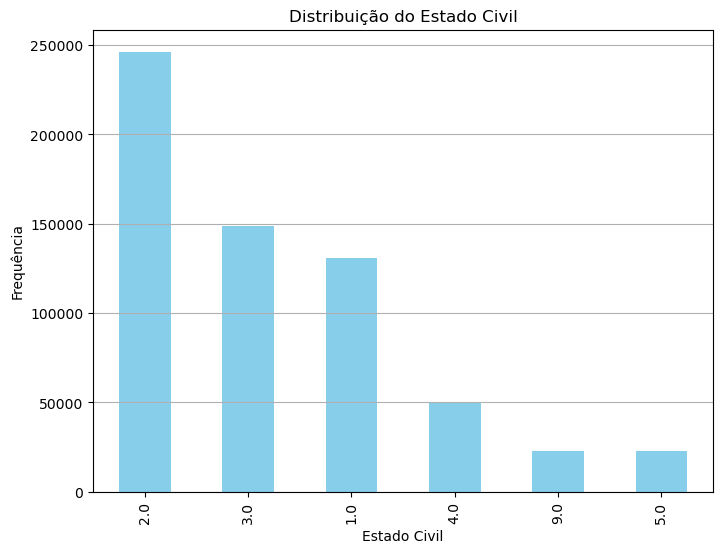

In [29]:
# Substituir os valores das variáveis categóricas pelos valores reais
estado_civil_counts = df_infarto['estado_civil'].value_counts()

# Gráfico de barras para a distribuição do estado civil
plt.figure(figsize=(8, 6))
estado_civil_counts.plot(kind='bar', color='skyblue')
plt.title('Distribuição do Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Frequência')
plt.grid(axis='y')
plt.show()


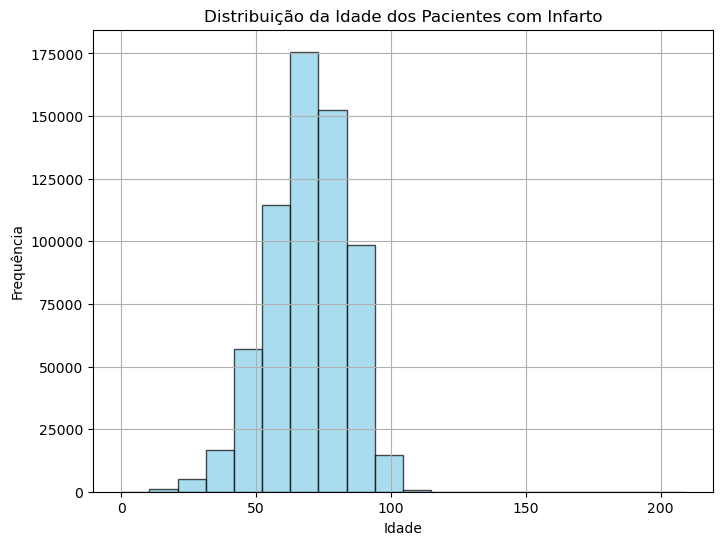

In [30]:
# Histograma da idade dos pacientes com infarto
plt.figure(figsize=(8, 6))
plt.hist(df_infarto['idade'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribuição da Idade dos Pacientes com Infarto')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

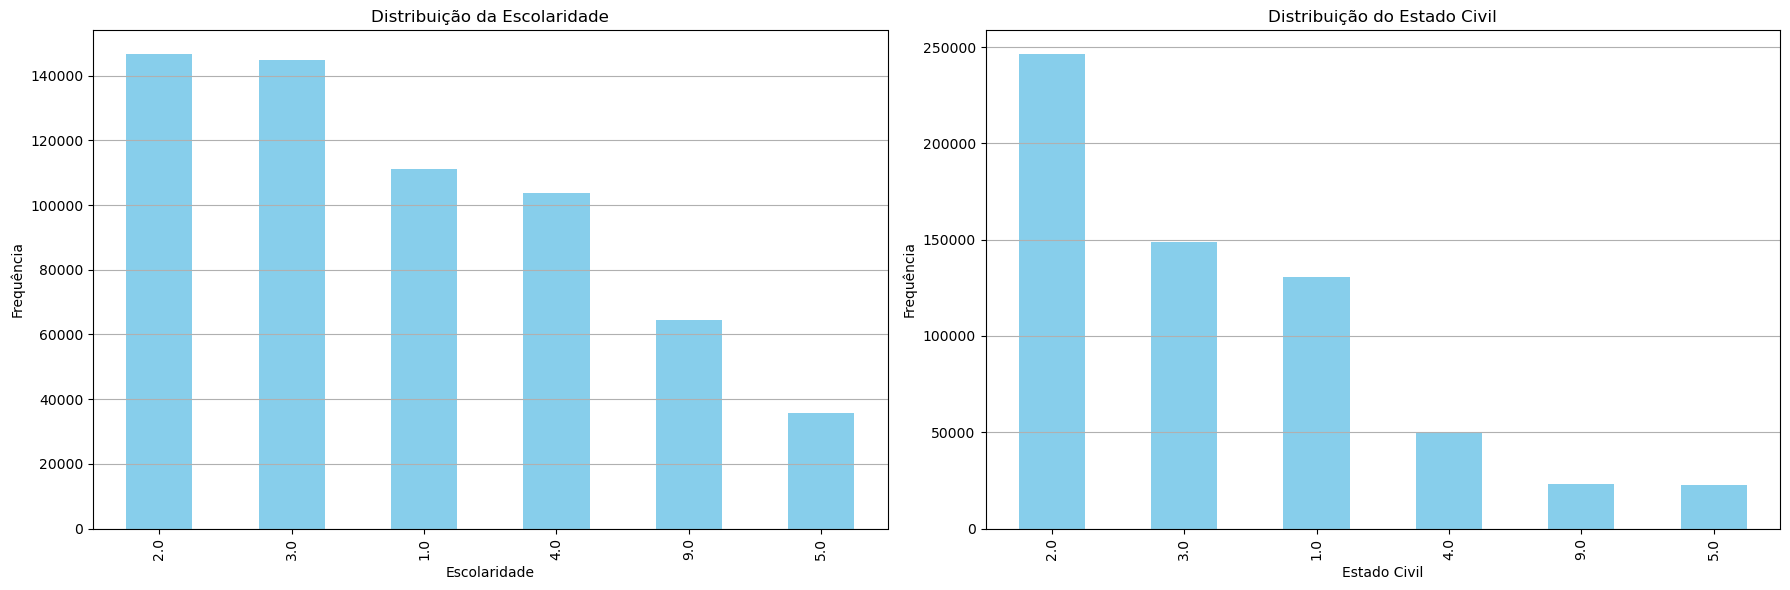

In [31]:
# Substituir os valores das variáveis categóricas pelos valores reais
escolaridade_counts = df_infarto['escolaridade'].value_counts()
estado_civil_counts = df_infarto['estado_civil'].value_counts()

# Gráficos de barra para as características socioeconômicas
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)  # Corrigido para 2 subplots
escolaridade_counts.plot(kind='bar', color='skyblue')
plt.title('Distribuição da Escolaridade')
plt.xlabel('Escolaridade')
plt.ylabel('Frequência')
plt.grid(axis='y')

plt.subplot(1, 2, 2)  # Corrigido para 2 subplots
estado_civil_counts.plot(kind='bar', color='skyblue')
plt.title('Distribuição do Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Frequência')
plt.grid(axis='y')

plt.tight_layout()
plt.show()


#### Recorte da base para pessoas com menos de 60 anos

In [32]:
df_infarto = df_infarto[df_infarto['idade'] < 60]

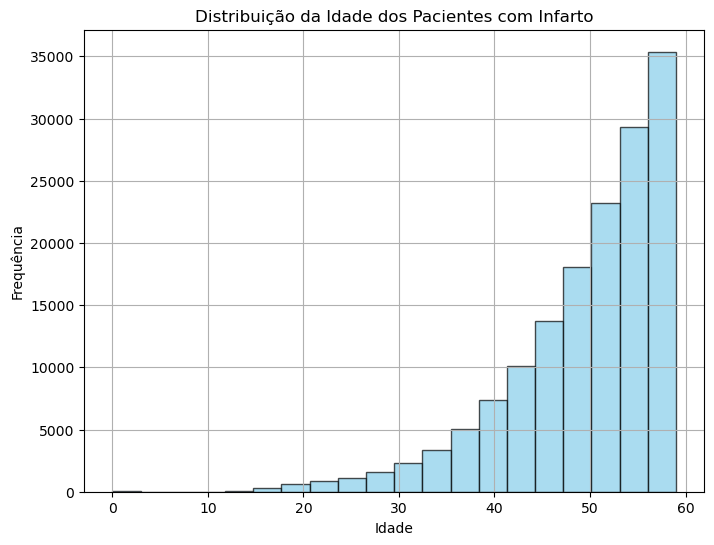

In [33]:
# Histograma da idade dos pacientes com infarto
plt.figure(figsize=(8, 6))
plt.hist(df_infarto['idade'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribuição da Idade dos Pacientes com Infarto')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

ocupacao
Dona de Casa     16234
Aposentado       12365
Agropecuária      7697
Pedreiro          6508
Agricultura       6271
Comerciante       5431
Desempregado      4516
Enfermeiro        3700
Não Informado     3697
Estudante         2587
Name: count, dtype: int64


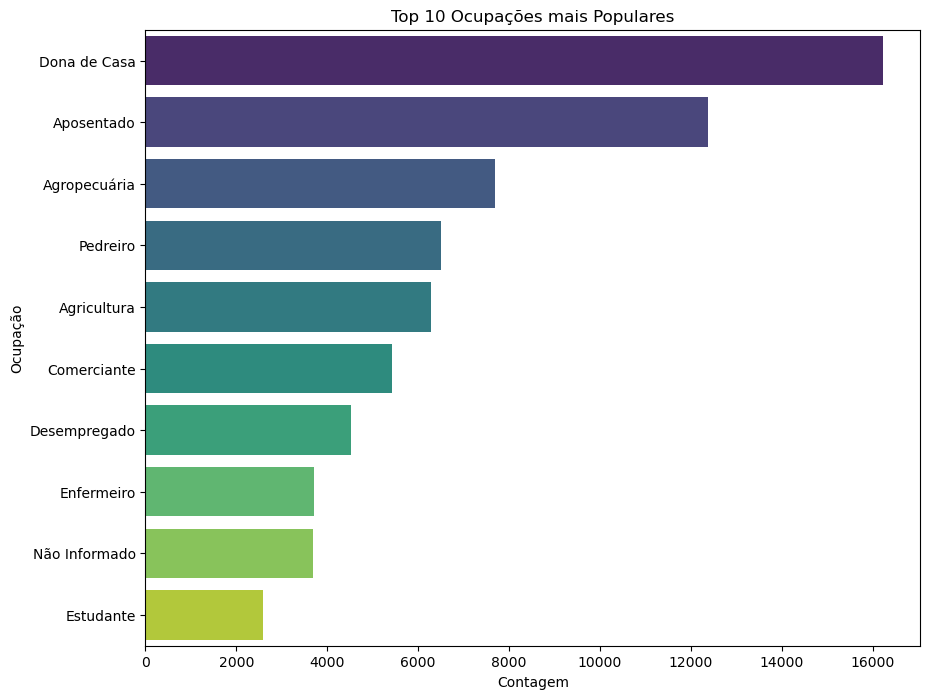

In [34]:
mapeamento_ocupacao = {
    999992.0: 'Dona de Casa',
    999993.0: 'Aposentado',
    621005.0: 'Agropecuária',
    715210.0: 'Pedreiro',
    622020.0: 'Agricultura',
    354705.0: 'Comerciante',
    999994.0: 'Desempregado',
    512105.0: 'Enfermeiro',
    998999.0: 'Não Informado',
    141410.0: 'Estudante',
}
# Aplicar o mapeamento à coluna de ocupação
df_infarto['ocupacao'] = df_infarto['ocupacao'].map(mapeamento_ocupacao)

# Calcular as contagens para cada ocupação
ocupacao_counts = df_infarto['ocupacao'].value_counts()

# Selecionar apenas as 10 ocupações mais populares
top_10_ocupacoes = ocupacao_counts.head(10)
print(top_10_ocupacoes)

# Plotar gráfico de contagem para as 10 ocupações mais populares
plt.figure(figsize=(10, 8))
sns.barplot(x=top_10_ocupacoes.values, y=top_10_ocupacoes.index, palette='viridis')
plt.title('Top 10 Ocupações mais Populares')
plt.xlabel('Contagem')
plt.ylabel('Ocupação')
plt.show()


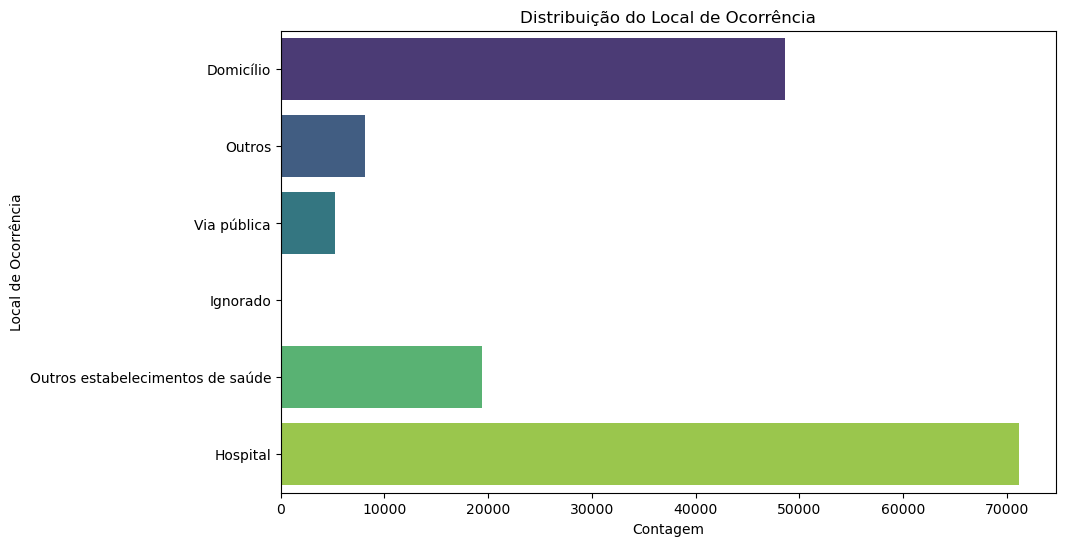

In [36]:
# Criar um mapeamento para os valores do local de ocorrência
mapeamento_local_ocorrencia = {
    1: 'Hospital',
    2: 'Outros estabelecimentos de saúde',
    3: 'Domicílio',
    4: 'Via pública',
    5: 'Outros',
    9: 'Ignorado'
}

# Aplicar o mapeamento à coluna de local de ocorrência
df_infarto['local_ocorrencia'] = df_infarto['local_ocorrencia'].map(mapeamento_local_ocorrencia)

# Plotar gráfico de contagem para o local de ocorrência
plt.figure(figsize=(10, 6))
sns.countplot(data=df_infarto, y='local_ocorrencia', palette='viridis')
plt.title('Distribuição do Local de Ocorrência')
plt.xlabel('Contagem')
plt.ylabel('Local de Ocorrência')
plt.show()
